In [75]:
#read the data
import pandas as pd
data=pd.read_csv('C://Users//kajal kapasiya//Desktop//data science//dataset//krishnaik_coding//diabetes//data//pima-data.csv')
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


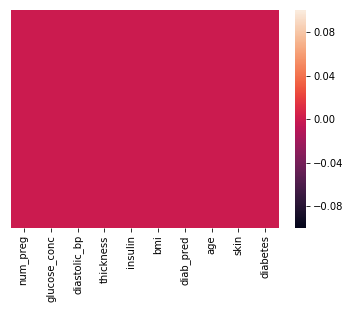

In [76]:
#check the null values
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(data.isnull(),yticklabels=False)

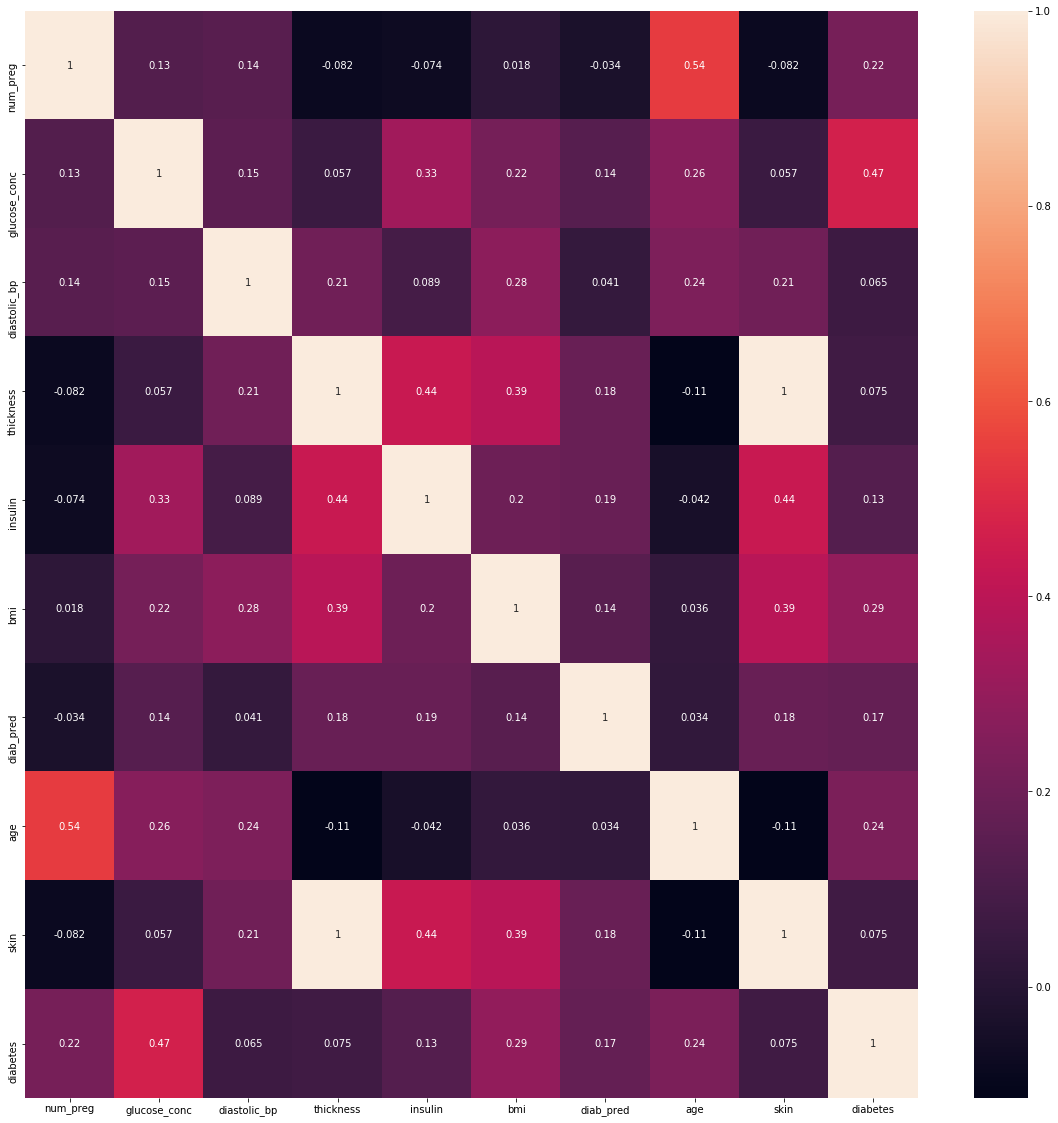

In [77]:
#check the correlation between predictors
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [78]:
#convert dependent variable into 1 or 0
target_map={True:1,False:0}
data['diabetes']=data['diabetes'].map(target_map)

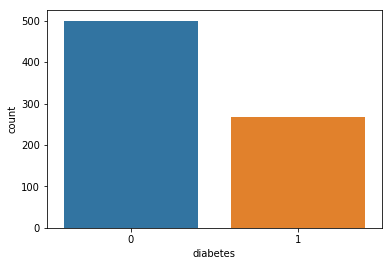

In [79]:
#check the balancing of target variable and can conclude that data is balanced
sns.countplot(data['diabetes'])

In [80]:
#create x for independent variables and y for dependent variable
from sklearn.model_selection import train_test_split
x=data.drop('diabetes',axis=1)
y=data['diabetes']

In [81]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [82]:
#list to hold the independent variables to pass for value check of zero
cols=['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age','skin']

In [83]:
#function to count the num of zero in features
def cal_0(df,col):
    leng=len(col)
    for i in range(leng):
        cnt=sum(df[col[i]].values==0)
        print('no of 0 in {} is {}'.format(col[i],cnt))
        i=i+1

In [84]:
#check the no of zero in x_train before replacement
cal_0(x_train,cols)

no of 0 in num_preg is 70
no of 0 in glucose_conc is 4
no of 0 in diastolic_bp is 23
no of 0 in thickness is 145
no of 0 in insulin is 250
no of 0 in bmi is 8
no of 0 in diab_pred is 0
no of 0 in age is 0
no of 0 in skin is 145


In [85]:
#check the no of zero in x_test before replacement
cal_0(x_test,cols)

no of 0 in num_preg is 41
no of 0 in glucose_conc is 1
no of 0 in diastolic_bp is 12
no of 0 in thickness is 82
no of 0 in insulin is 124
no of 0 in bmi is 3
no of 0 in diab_pred is 0
no of 0 in age is 0
no of 0 in skin is 82


In [86]:
#compute the value for zero values in the features
from sklearn.preprocessing import Imputer
fill_values=Imputer(missing_values=0,strategy='mean',axis=0)
x_train=fill_values.fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=cols)
x_test=fill_values.fit_transform(x_test)
x_test=pd.DataFrame(x_test,columns=cols)

In [87]:
#check the no of zero in x_train after replacement
cal_0(x_train,cols)

no of 0 in num_preg is 0
no of 0 in glucose_conc is 0
no of 0 in diastolic_bp is 0
no of 0 in thickness is 0
no of 0 in insulin is 0
no of 0 in bmi is 0
no of 0 in diab_pred is 0
no of 0 in age is 0
no of 0 in skin is 0


In [88]:
#check the no of zero in x_test after replacement
cal_0(x_test,cols)

no of 0 in num_preg is 0
no of 0 in glucose_conc is 0
no of 0 in diastolic_bp is 0
no of 0 in thickness is 0
no of 0 in insulin is 0
no of 0 in bmi is 0
no of 0 in diab_pred is 0
no of 0 in age is 0
no of 0 in skin is 0


In [89]:
#apply random forest classification
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [90]:
#predict the values
pred=rfc.predict(x_test)

In [91]:
#check the accuracy
from sklearn import metrics
print('accuracy is',metrics.accuracy_score(y_test,pred))

accuracy is 0.727272727273
